In [81]:
#About the dataset columns
# Input columns

#instant: record index
#dteday: date
#season: season (1:spring, 2:summer, 3:fall, 4:winter)
#yr: year (0: 2011, 1:2012)
#mnth: month ( 1 to 12)
#holiday: weather day is holiday sor not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#weekday: day of the week
#workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
#temp: Normalized temperature in Celsius. The values are divided to 41 (max)
#atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
#hum: Normalized humidity. The values are divided to 100 (max)
#windspeed: Normalized wind speed. The values are divided to 67 (max)
#casual: count of casual users
#registered: count of registered users

#Output Column

#cnt: count of total rental bikes 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error  
os.chdir("G:\EdwisorFiles\BikeRental_Task\Bike-Rental-Prediction-master")

In [2]:
Bike_data=pd.read_csv("day.csv")

In [3]:
#Printing first 5 rows of the data
Bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [99]:
#Checking size of the given data
Bike_data.shape
#Implies it has 731 rows and 16 columns

(731, 16)

In [100]:
#Understanding the data
print(Bike_data.describe())
print("")
print("")
Bike_data['season'].value_counts()

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [4]:
#Covert the dataset into dataframe
df_Bike=pd.DataFrame(Bike_data)

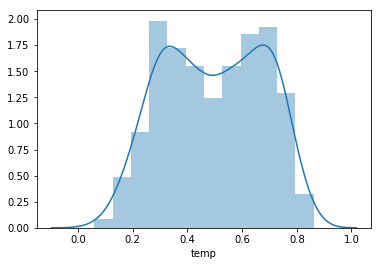

In [6]:
# Get distribution plots of different contigous features
sns.distplot(df_Bike['temp'])

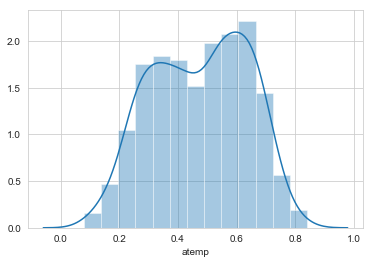

In [15]:
sns.distplot(df_Bike['atemp'])

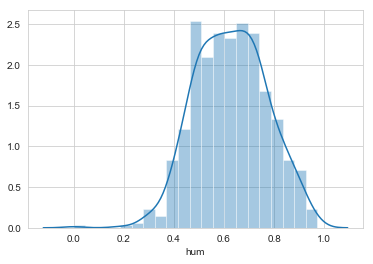

In [16]:
sns.distplot(df_Bike['hum'])

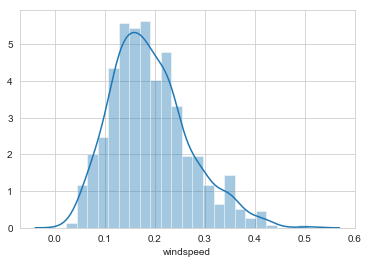

In [17]:
sns.distplot(df_Bike['windspeed'])

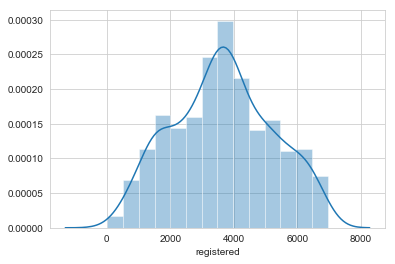

In [46]:
sns.distplot(df_Bike['registered'])

# Observations:

i. Observed features are normally distributed.

ii. Specially, feature 'registered' is very close to normal distribution.

In [7]:
df_Bike.groupby('season').describe()

instant                                                               \
         count        mean         std    min     25%    50%     75%    max   
season                                                                        
1        181.0  262.685083  212.113584    1.0   46.00  366.0  411.00  731.0   
2        184.0  308.500000  185.421422   80.0  125.75  308.5  491.25  537.0   
3        188.0  401.500000  185.494670  172.0  218.75  401.5  584.25  631.0   
4        178.0  493.000000  185.315764  266.0  310.25  493.0  675.75  720.0   

           yr            ... registered            cnt               \
        count      mean  ...        75%     max  count         mean   
season                   ...                                          
1       181.0  0.502762  ...    3162.00  5315.0  181.0  2604.132597   
2       184.0  0.500000  ...    4927.75  6456.0  184.0  4992.331522   
3       188.0  0.500000  ...    5667.75  6917.0  188.0  5644.303191   
4       178.0  0.500000  ...    5075.50  6946.0  178.0  4728.162921   

                                                              
                std     min     25%     50%      75%     max  
season                                                        
1       1399.942119   431.0  1538.0  2209.0  3456.00  7836.0  
2       1695.977235   795.0  4003.0  4941.5  6377.00  8362.0  
3       1459.800381  1115.0  4586.5  5353.5  6929.25  8714.0  
4       1699.615261    22.0  3615.5  4634.5  5624.50  8555.0  

[4 rows x 112 columns]

In [8]:
bike_Season1=df_Bike.loc[df_Bike['season']==1]
bike_Season2=df_Bike.loc[df_Bike['season']==2]
bike_Season3=df_Bike.loc[df_Bike['season']==3]
bike_Season4=df_Bike.loc[df_Bike['season']==4]

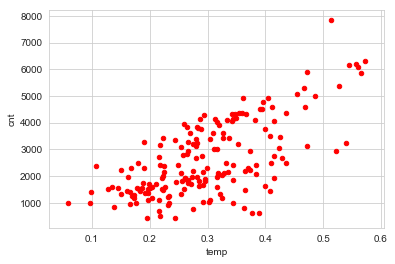

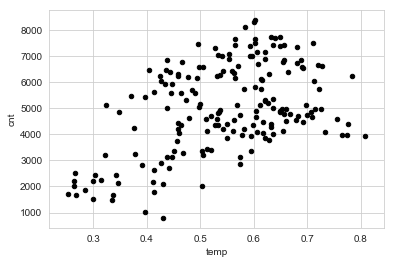

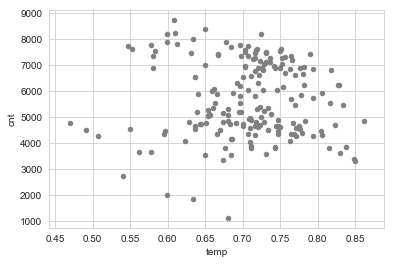

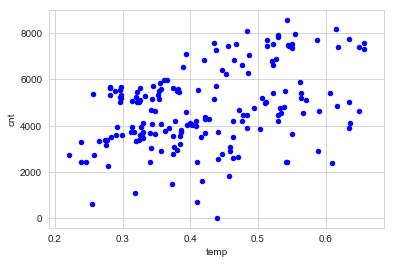

In [42]:
sns.set_style("whitegrid")
bike_Season1.plot.scatter(y="cnt",x="temp",color='red')
bike_Season2.plot.scatter(y="cnt",x="temp",color='black')
bike_Season3.plot.scatter(y="cnt",x="temp",color='gray')
bike_Season4.plot.scatter(y="cnt",x="temp",color='b')
plt.show()

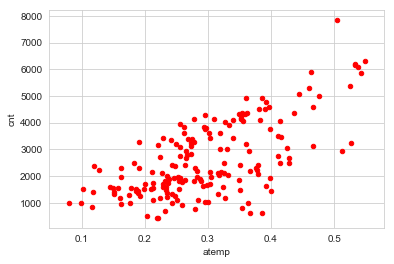

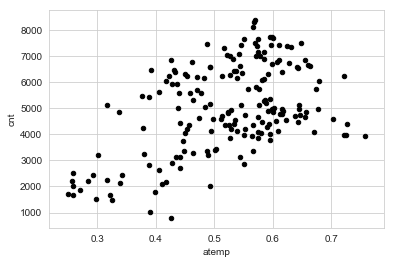

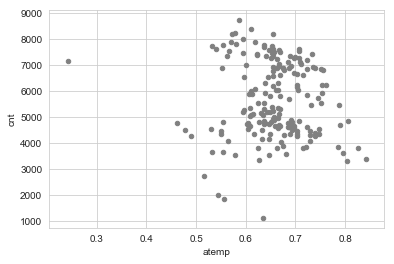

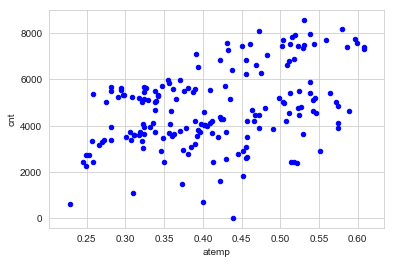

In [43]:
sns.set_style("whitegrid")
bike_Season1.plot.scatter(y="cnt",x="atemp",color='red')
bike_Season2.plot.scatter(y="cnt",x="atemp",color='black')
bike_Season3.plot.scatter(y="cnt",x="atemp",color='gray')
bike_Season4.plot.scatter(y="cnt",x="atemp",color='b')
plt.show()

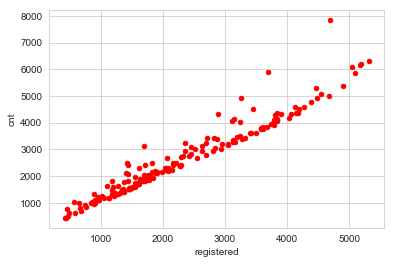

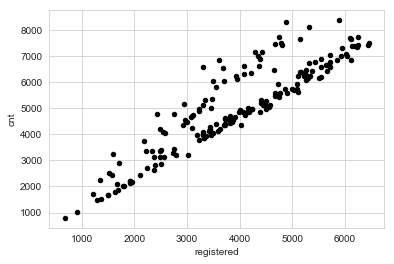

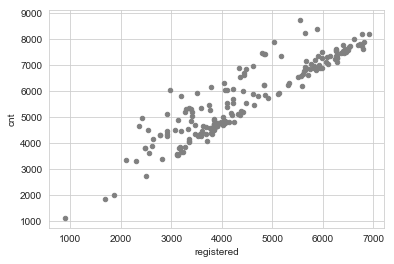

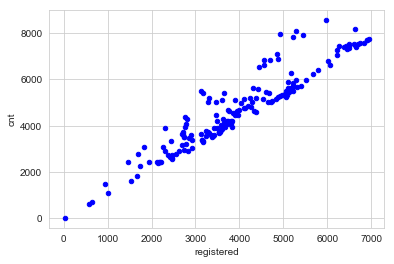

In [44]:
sns.set_style("whitegrid")
bike_Season1.plot.scatter(y="cnt",x="registered",color='red')
bike_Season2.plot.scatter(y="cnt",x="registered",color='black')
bike_Season3.plot.scatter(y="cnt",x="registered",color='gray')
bike_Season4.plot.scatter(y="cnt",x="registered",color='b')
plt.show()

In [51]:
#Pair plots w.r.t numerical features
New_df=pd.concat([df_Bike['temp'],df_Bike['atemp'],df_Bike['registered'],df_Bike['hum'],df_Bike['windspeed'],df_Bike['casual'],df_Bike['cnt']],1)


D:\Python3_AI\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


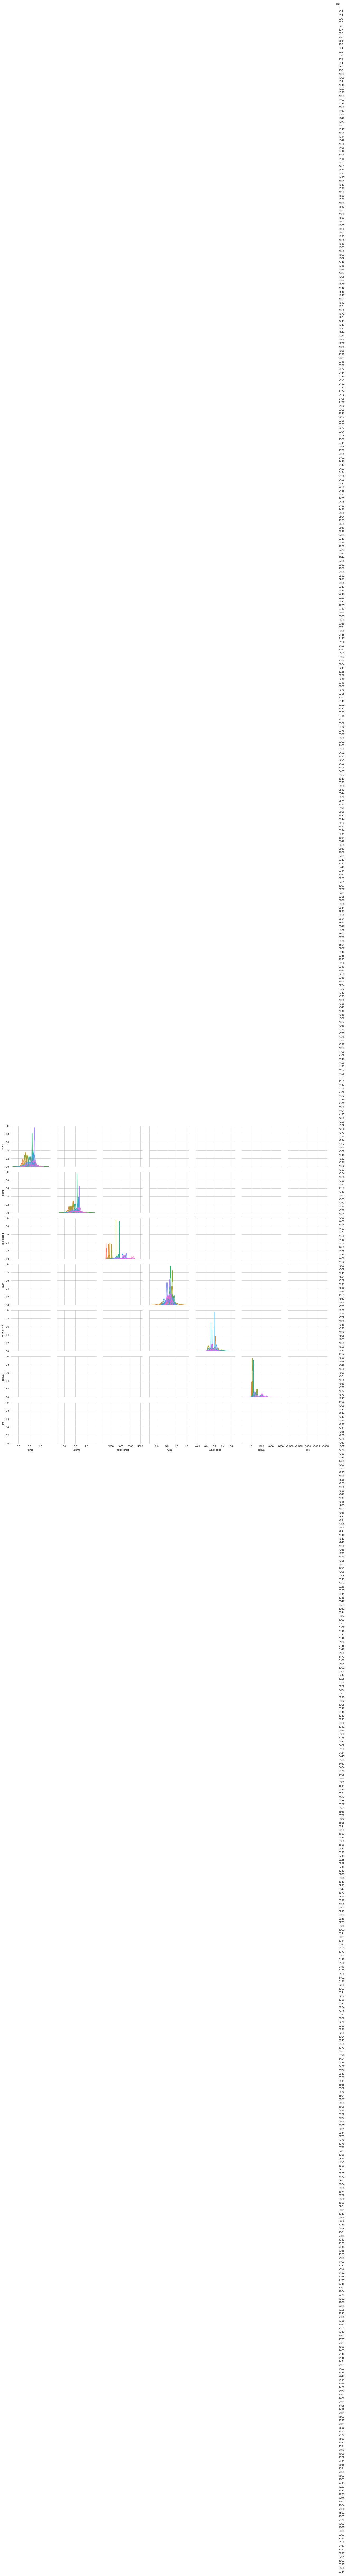

In [53]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(New_df,hue='cnt',size=2.5,kind='regular')
plt.show()

# Observations of scatterplot:
i. After dividing data set into four different data sets, w.r.t season.

ii. All numerical features except registered doesn't seems helpful. Since each scatter plot doesn't show any pattern, which wll be helpful to predict target variable 'cnt'.

iii. Whereas, registered variable in all season follows linear pattern.

# Outlier Analysis

[0.0591304, 0.3370835, 0.49833299999999997, 0.6554165000000001]
points are outliers if below -0.14041600000000015 and above 1.1329160000000003


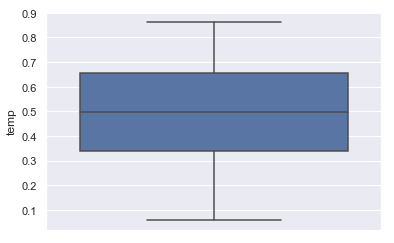

In [31]:
# Let's check the ooutliers for each continous/numerical variable with the help of box plot.
percentiles=list(np.percentile(df_Bike['temp'],np.arange(0,100,25)))
print(percentiles)
IQR=percentiles[3]-percentiles[1]
whisker_pos=percentiles[3]+(1.5*IQR)
whisker_neg=percentiles[1]-(1.5*IQR)
sns.boxplot( y=df_Bike['temp'])
print("points are outliers if below {0} and above {1}".format(whisker_neg,whisker_pos))

[0.0790696, 0.3378425, 0.48673299999999997, 0.6086020000000001]
points are outliers if below -0.06829675000000018 and above 1.0147412500000002


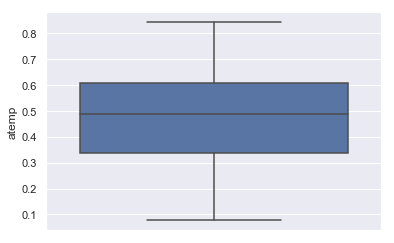

In [32]:
percentiles=list(np.percentile(df_Bike['atemp'],np.arange(0,100,25)))
print(percentiles)
IQR=percentiles[3]-percentiles[1]
whisker_pos=percentiles[3]+(1.5*IQR)
whisker_neg=percentiles[1]-(1.5*IQR)
sns.boxplot( y=df_Bike['atemp'])
print("points are outliers if below {0} and above {1}".format(whisker_neg,whisker_pos))

[20.0, 2497.0, 3662.0, 4776.5]
points are outliers if below -922.25 and above 8195.75


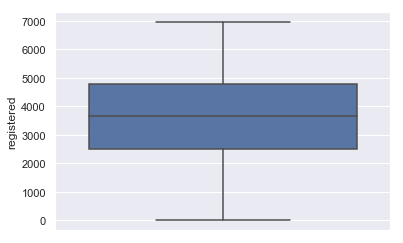

In [33]:
percentiles=list(np.percentile(df_Bike['registered'],np.arange(0,100,25)))
print(percentiles)
IQR=percentiles[3]-percentiles[1]
whisker_pos=percentiles[3]+(1.5*IQR)
whisker_neg=percentiles[1]-(1.5*IQR)
sns.boxplot( y=df_Bike['registered'])
print("points are outliers if below {0} and above {1}".format(whisker_neg,whisker_pos))

[2.0, 315.5, 713.0, 1096.0]
points are outliers if below -855.25 and above 2266.75


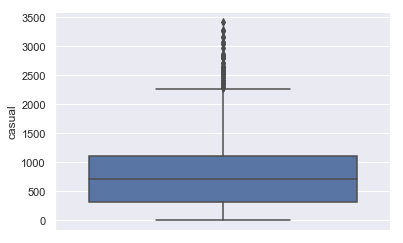

In [34]:
percentiles=list(np.percentile(df_Bike['casual'],np.arange(0,100,25)))
print(percentiles)
IQR=percentiles[3]-percentiles[1]
whisker_pos=percentiles[3]+(1.5*IQR)
whisker_neg=percentiles[1]-(1.5*IQR)
sns.boxplot( y=df_Bike['casual'])
print("points are outliers if below {0} and above {1}".format(whisker_neg,whisker_pos))

In [48]:
def fnCheck_Outlier_OrNot(x):
    if x>=2266.5:
        return(x)


In [51]:
list_casual=list(df_Bike['casual'])
print(len(list_casual))
l=list(filter(fnCheck_Outlier_OrNot,list_casual))
print(len(l))
print(len(l)/len(list_casual))

# i. Only 44 rows(6% of the data) has outliers so there is nothing harm in 
#  removing outliers.
# ii. Before removing we will make copy of the data frame, in case if we are removing feature
#  'casual', we can use the actual data set. Before removing outliers, as we might be removing
#   valuable data from other features.

731
44
0.060191518467852256


In [57]:
# Removal of outiers
df_Bike_Copy=df_Bike.copy()
df_Bike_Copy = df_Bike_Copy.drop(df_Bike_Copy[df_Bike_Copy.loc[:,'casual'] > 226.5].index)
print(df_Bike_Copy.shape)

(136, 16)


Observations:

i. In feature 'casual' we see outliers

# Observations of scatterplot and Outliers:
i. After dividing data set into four different data sets, w.r.t season.

ii. All numerical features except registered doesn't seems helpful. Since each scatter plot doesn't show any pattern, which wll be helpful to predict target variable 'cnt'.

iii. Whereas, registered variable in all season follows linear pattern.

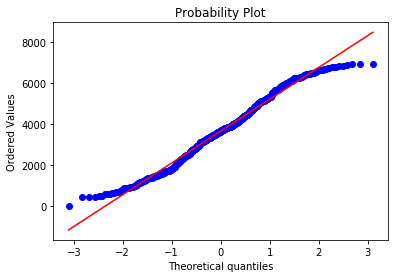

In [5]:
# Quantile-Quantile plot, to check dist of each continous features are normally
# distributed or not. 
stats.probplot(df_Bike['registered'],dist="norm",plot=pylab)
pylab.show()
# 'registered' feature is normally distributed

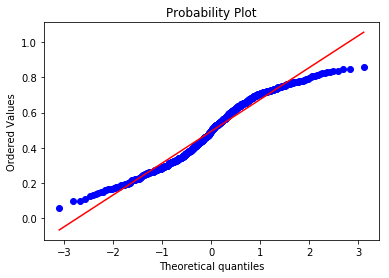

In [6]:
stats.probplot(df_Bike['temp'],dist="norm",plot=pylab)
pylab.show()
#'temp' feature is normally distributed 

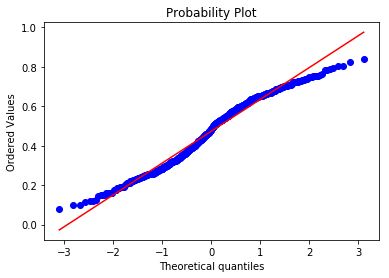

In [7]:
stats.probplot(df_Bike['atemp'],dist="norm",plot=pylab)
pylab.show()
# 'atemp' feature is normally distributed

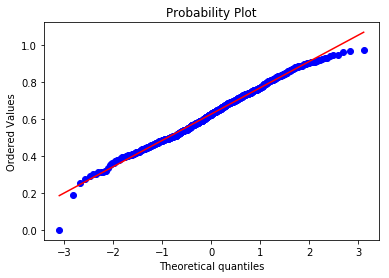

In [8]:
stats.probplot(df_Bike['hum'],dist="norm",plot=pylab)
pylab.show()
# 'hum' feature is shows perfect nature of normal distribution as compared to other features

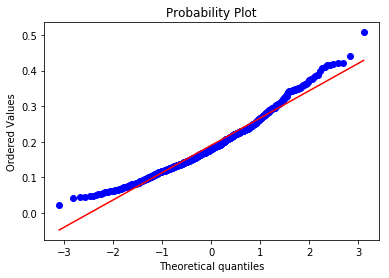

In [9]:
stats.probplot(df_Bike['windspeed'],dist="norm",plot=pylab)
pylab.show()

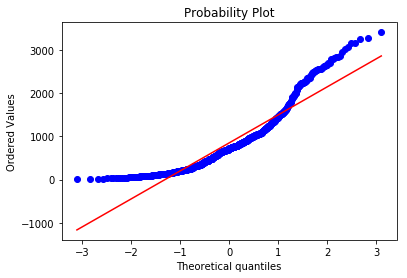

In [10]:
stats.probplot(df_Bike['casual'],dist="norm",plot=pylab)
pylab.show()
# 'casual' feature has skewness in it's distribution, deviated from normal distribution, as we can see below.

# Missing Value Analysis

In [11]:
Total_NullValues=df_Bike.isnull().sum().sort_values(ascending=False)
print(Total_NullValues)
#Observation
# a. There are no null values in any feature

cnt           0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dteday        0
instant       0
dtype: int64


# Feature reduction


[Text(0.5, 0, 'instant'),
 Text(1.5, 0, 'season'),
 Text(2.5, 0, 'yr'),
 Text(3.5, 0, 'mnth'),
 Text(4.5, 0, 'holiday'),
 Text(5.5, 0, 'weekday'),
 Text(6.5, 0, 'workingday'),
 Text(7.5, 0, 'weathersit'),
 Text(8.5, 0, 'temp'),
 Text(9.5, 0, 'atemp'),
 Text(10.5, 0, 'hum'),
 Text(11.5, 0, 'windspeed'),
 Text(12.5, 0, 'casual'),
 Text(13.5, 0, 'registered'),
 Text(14.5, 0, 'cnt')]

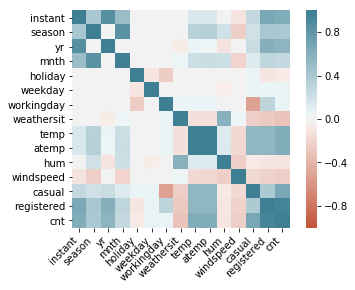

In [12]:
# Before that we will se correlation between features
corr_Bike=df_Bike.corr()
heatmap_Bike = sns.heatmap(
    corr_Bike, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heatmap_Bike.set_xticklabels(
    heatmap_Bike.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

D:\Python3_AI\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


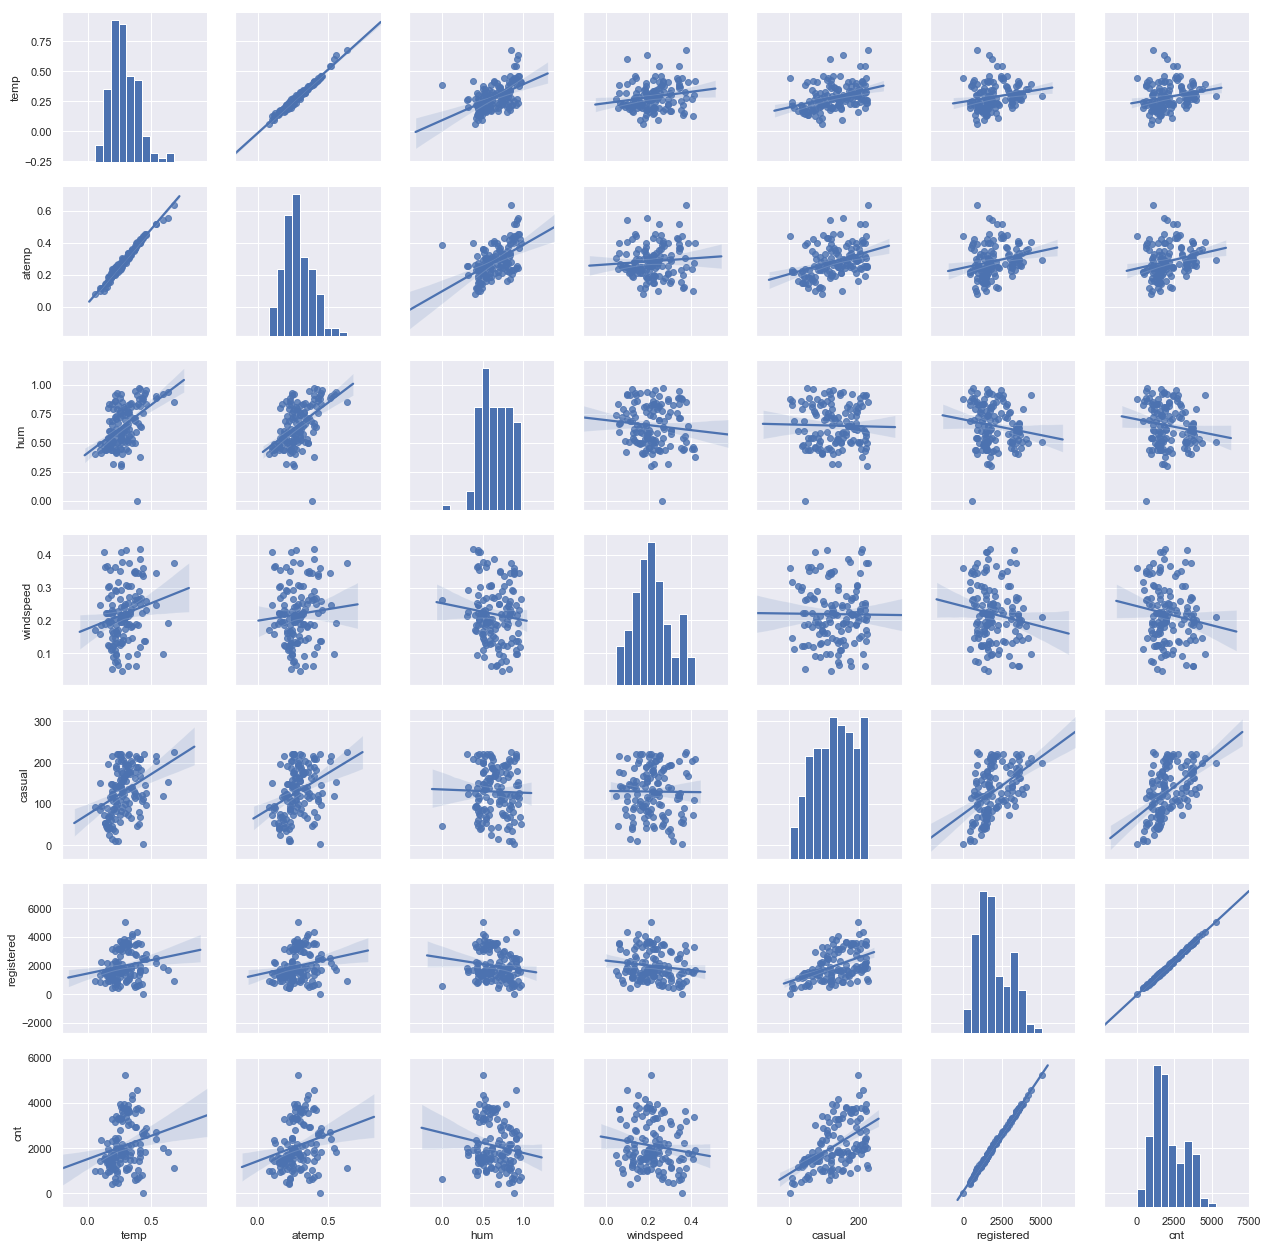

In [61]:
# Getting pairplots for continous variables
sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(df_Bike[cols], size = 2.5,kind="reg")
plt.show();

# Observations:
 i. In correlation heat map, featurs <'season', 'month', 'weekend', 'workingday'> are very less correlated to target variable count. So we can remove such features.
    
 ii. In pair plot analysis of numerical features as we see, that feature atemp and temp are highly correlated to each. Which might might effect prdictions. It's better to remove one amongst them.
 
 iii. Hum and windspeed is very less correlated to target feature 'cnt', we can remave said features too.

In [14]:
# Adding feature season, as we saw above that season is also highly correlated to cnt
# Also, it's intuitional that season really effects the bike hiring.
Final_BikeData = df_Bike.loc[:,['instant','season','yr','mnth','temp','holiday','weekday','workingday','weathersit', 'windspeed', 'casual', 'registered', 'cnt']]

print(Final_BikeData.head())

print(Final_BikeData.shape)

   instant  season  yr  mnth      temp  holiday  weekday  workingday  \
0        1       1   0     1  0.344167        0        6           0   
1        2       1   0     1  0.363478        0        0           0   
2        3       1   0     1  0.196364        0        1           1   
3        4       1   0     1  0.200000        0        2           1   
4        5       1   0     1  0.226957        0        3           1   

   weathersit  windspeed  casual  registered   cnt  
0           2   0.160446     331         654   985  
1           2   0.248539     131         670   801  
2           1   0.248309     120        1229  1349  
3           1   0.160296     108        1454  1562  
4           1   0.186900      82        1518  1600  
(731, 13)


# Feature scaling:
    

In [15]:
# As we see casual and registered column needs scaling
col=['casual','registered']

for ithCol in col:
    Final_BikeData[ithCol]=(Final_BikeData[ithCol] - min(Final_BikeData[ithCol]))/(max(Final_BikeData[ithCol]) - min(Final_BikeData[ithCol]))
    

In [15]:
# Data after preprocessing 
print(Final_BikeData.head())
print(Final_BikeData.shape)

   instant  season  yr  mnth      temp  holiday  weekday  workingday  \
0        1       1   0     1  0.344167        0        6           0   
1        2       1   0     1  0.363478        0        0           0   
2        3       1   0     1  0.196364        0        1           1   
3        4       1   0     1  0.200000        0        2           1   
4        5       1   0     1  0.226957        0        3           1   

   weathersit  windspeed    casual  registered   cnt  
0           2   0.160446  0.096538    0.091539   985  
1           2   0.248539  0.037852    0.093849   801  
2           1   0.248309  0.034624    0.174560  1349  
3           1   0.160296  0.031103    0.207046  1562  
4           1   0.186900  0.023474    0.216286  1600  
(731, 13)


# Splitting data into train test and validation


In [25]:

FinalData_Copy=Final_BikeData.copy()

Y=Final_BikeData['cnt']
X=FinalData_Copy.drop('cnt', axis=1)




In [24]:
for i in Final_BikeData.columns:
    print(Final_BikeData[i].value_counts())

731    1
251    1
249    1
248    1
247    1
246    1
245    1
244    1
243    1
242    1
241    1
240    1
239    1
238    1
237    1
236    1
235    1
234    1
233    1
232    1
231    1
250    1
252    1
229    1
253    1
272    1
271    1
270    1
269    1
268    1
      ..
466    1
465    1
464    1
463    1
462    1
461    1
460    1
479    1
480    1
481    1
492    1
500    1
499    1
498    1
497    1
496    1
495    1
494    1
493    1
491    1
482    1
490    1
489    1
488    1
487    1
486    1
485    1
484    1
483    1
1      1
Name: instant, Length: 731, dtype: int64
3    188
2    184
1    181
4    178
Name: season, dtype: int64
1    366
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
0.265833    5
0.635000    5
0.437500    4
0.564167    4
0.649167    4
0.484167    4
0.680000    4
0.696667    4
0.710833    4
0.514167    3
0.282500    3
0.667500    3
0.459

In [26]:
print(X.shape)
print(Y.shape)

(731, 12)
(731,)


In [53]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,random_state=1,test_size=0.2)
df_Xtrain,x_cv,df_Ytrain,y_cv=train_test_split(x_train,y_train,random_state=1,test_size=0.2)

In [54]:
print(X.shape)
print(df_Xtrain.shape)
print(df_Ytrain.shape)
print(x_cv.shape)
print(y_cv.shape)
# As we can see that after splitting, Train and test data maintained the behaviour of day_data set

(731, 12)
(467, 12)
(467,)
(117, 12)
(117,)


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
import math
regressor=DecisionTreeRegressor()
model=regressor.fit(df_Xtrain,df_Ytrain)

predict_cv=model.predict(x_cv)
predict_Test=model.predict(x_test)

print(r2_score(y_cv, predict_cv))
print(r2_score(y_test, predict_Test))

print(math.sqrt(mean_squared_error(y_cv, predict_cv)))
print(math.sqrt(mean_squared_error(y_test, predict_Test)))

0.9804888018628366
0.9904809207937622
277.6827187775507
187.55884337426255


Observations:
i. To check accuracy of Decision tree, I opted for cross validation approach

ii. On cross validation data, getting r2 value as .9793 and on test data .99

iii. So, there is no overfitting in our case. We can still make sure that overfit or underfit doesn't happens by changing the depth and sample_splits of the tree.

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

0.9941195346017778
0.994885245849489
152.44484134560545
137.48409440699115


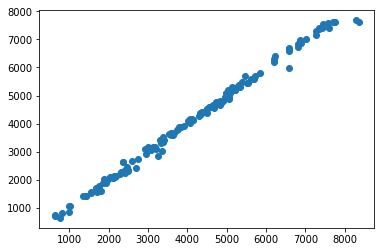

In [84]:
regressor=RandomForestRegressor(n_estimators= 350, random_state=100)
model=regressor.fit(df_Xtrain,df_Ytrain)

predict_cv=model.predict(x_cv)
predict_Test=model.predict(x_test)

print(r2_score(y_cv, predict_cv))
print(r2_score(y_test, predict_Test))

print(math.sqrt(mean_squared_error(y_cv, predict_cv)))
print(math.sqrt(mean_squared_error(y_test, predict_Test)))

#Plotting Predicted value and actual values
plt.scatter(x=y_test, y=predict_Test)
plt.show()
# Just by looking at the graph, we can see that accuracy is good.

# KNN

In [72]:
from sklearn.neighbors import KNeighborsRegressor

0.8086248982287962
0.7872035763554049
869.6602110438782
886.7929626399459


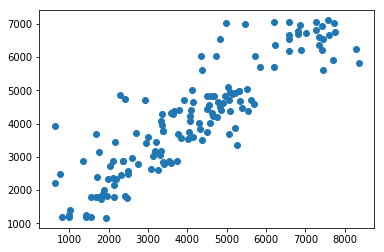

In [85]:
regressor=KNeighborsRegressor(11)
    
model=regressor.fit(df_Xtrain,df_Ytrain)

predict_cv=model.predict(x_cv)
predict_Test=model.predict(x_test)

print(r2_score(y_cv, predict_cv))
print(r2_score(y_test, predict_Test))

print(math.sqrt(mean_squared_error(y_cv, predict_cv)))
print(math.sqrt(mean_squared_error(y_test, predict_Test)))

#Plotting Predicted value and actual values
plt.scatter(x=y_test, y=predict_Test)
plt.show()
# Just by looking at the graph, we can see that accuracy is bad compared to Decision tree and random forest regressor.

# Linear Regression


In [88]:
from sklearn.linear_model import LinearRegression

1.0
1.0
4.039764180740064e-12
3.9949721907825616e-12


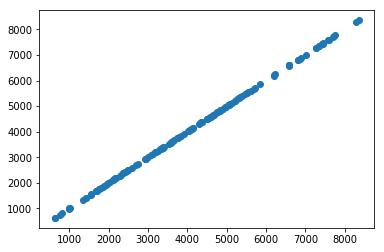

In [89]:
regressor=LinearRegression(11)
    
model=regressor.fit(df_Xtrain,df_Ytrain)

predict_cv=model.predict(x_cv)
predict_Test=model.predict(x_test)

print(r2_score(y_cv, predict_cv))
print(r2_score(y_test, predict_Test))

print(math.sqrt(mean_squared_error(y_cv, predict_cv)))
print(math.sqrt(mean_squared_error(y_test, predict_Test)))

#Plotting Predicted value and actual values
plt.scatter(x=y_test, y=predict_Test)
plt.show()

Observations:

i. Linear regression proved to be an best fit model for our data. Result is promising.

ii. While data exploration also, we observed a linear flow in the data.

iii. Season, month, weekend, working day were less correlated to target feature cnt. So, we removed them. Whereas in case of temp and atemp, they were highly correlated on each other, which will effect our prediction.

iv. When it came to feature selection, we directly plotted correlation heat map and selected the features on our observation. 

v. But if number of features are more than, it's better to go for PCA or TSNE (Feature selection algo's)